#Nilanjan Debnath MDS201919 NLP assignment 3

Importing Packages

In [ ]:
from gensim.test.utils import datapath
from gensim import utils
import gensim.models
from gensim.parsing.preprocessing import remove_stopwords
from gensim.models import Word2Vec, KeyedVectors
import time
import logging
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
#from gensim.utils import lemmatize
from nltk.stem import WordNetLemmatizer

NLTK lemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
class MyCorpus:
    """An iterator that yields sentences (lists of str)."""

    def __iter__(self):
        #corpus_path = path('content/drive/MyDrive/data/corpus2.txt')
        for line in open('drive/MyDrive/data/corpus2.txt'):
            # assume there's one document per line, tokens separated by whitespace
            line = remove_stopwords(line)
            lemmatized_out = [lemmatizer.lemmatize(word) for word in line.split(' ')]
            tokens = utils.simple_preprocess(' '.join(lemmatized_out))
            if(len(tokens) < 5): continue
            else:
              yield tokens

Our corpus after removing stopwords and doing lemmatization

In [ ]:
sentences = MyCorpus()

Creating the model

In [ ]:
start = time.time()
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
model = Word2Vec(sentences, size=128, window=5, min_count=50, workers=10, iter=10)
model.save('drive/MyDrive/data/corpus2model.bin')
end = time.time()
print('Execution time in seconds: ' + str(end-start))

Streaming output truncated to the last 5000 lines.
2021-03-31 16:14:10,113 : INFO : EPOCH 6 - PROGRESS: at 73.80% examples, 87683 words/s, in_qsize 0, out_qsize 0
2021-03-31 16:14:11,159 : INFO : EPOCH 6 - PROGRESS: at 73.88% examples, 87687 words/s, in_qsize 1, out_qsize 0
2021-03-31 16:14:12,192 : INFO : EPOCH 6 - PROGRESS: at 73.97% examples, 87692 words/s, in_qsize 0, out_qsize 0
2021-03-31 16:14:13,224 : INFO : EPOCH 6 - PROGRESS: at 74.05% examples, 87697 words/s, in_qsize 0, out_qsize 0
2021-03-31 16:14:14,243 : INFO : EPOCH 6 - PROGRESS: at 74.13% examples, 87704 words/s, in_qsize 0, out_qsize 0
2021-03-31 16:14:15,319 : INFO : EPOCH 6 - PROGRESS: at 74.23% examples, 87704 words/s, in_qsize 0, out_qsize 0
2021-03-31 16:14:16,375 : INFO : EPOCH 6 - PROGRESS: at 74.31% examples, 87707 words/s, in_qsize 0, out_qsize 0
2021-03-31 16:14:17,394 : INFO : EPOCH 6 - PROGRESS: at 74.39% examples, 87713 words/s, in_qsize 0, out_qsize 0
2021-03-31 16:14:18,498 : INFO : EPOCH 6 - PROGRESS: 

Execution time in seconds: 13090.19221830368


Computing the top 5 similar words 

In [ ]:
def compute_similar_words(model,source_word, topn=5):
    print('\r Computing similar words for the source word - {0}'.format(source_word),end='')
    similar_words = [source_word]
    try:
        top_words = model.wv.most_similar(source_word,topn=topn)
        similar_words.extend([val[0] for val in top_words])
    except KeyError as err:
        print(err.args)
    return similar_words 

As an example, computing the top 5 similar words of hospital

In [ ]:
compute_similar_words(model,'hospital')

2021-03-31 18:28:25,331 : INFO : precomputing L2-norms of word weight vectors


 Computing similar words for the source word - hospital

['hospital', 'hospitals', 'inpatient', 'ward', 'icu', 'icus']

The list of keywords we are using

In [ ]:
keywords = ['hunger','india','china','virus','pollution','vaccine','corona','hospital','patient','study']

In [ ]:
def compute_similar_words_for_assignment3(model): 
    columns = ['word'+str(i-1) for i in range(1,7)]
    df = pd.DataFrame(data=None,columns=columns)
    for source_word in keywords:
        similar_words = compute_similar_words(model,source_word)
        df.loc[len(df)] = similar_words
        for i in range(1,len(similar_words)):
            sec_similar_words = compute_similar_words(model,similar_words[i])
            df.loc[len(df)] = sec_similar_words
            for i in range(1,len(sec_similar_words)):
              third_similar_words = compute_similar_words(model,sec_similar_words[i])
              df.loc[len(df)] = third_similar_words
   #Save similar words to a file. This file will be used to build the graph
    df.to_csv('drive/MyDrive/data/similar_words_assignment32.csv')

Computing the similar words 3 levels deep to our given keywords to build a csv 

In [ ]:
compute_similar_words_for_assignment3(model)

 Computing similar words for the source word - calculation

Building the graph

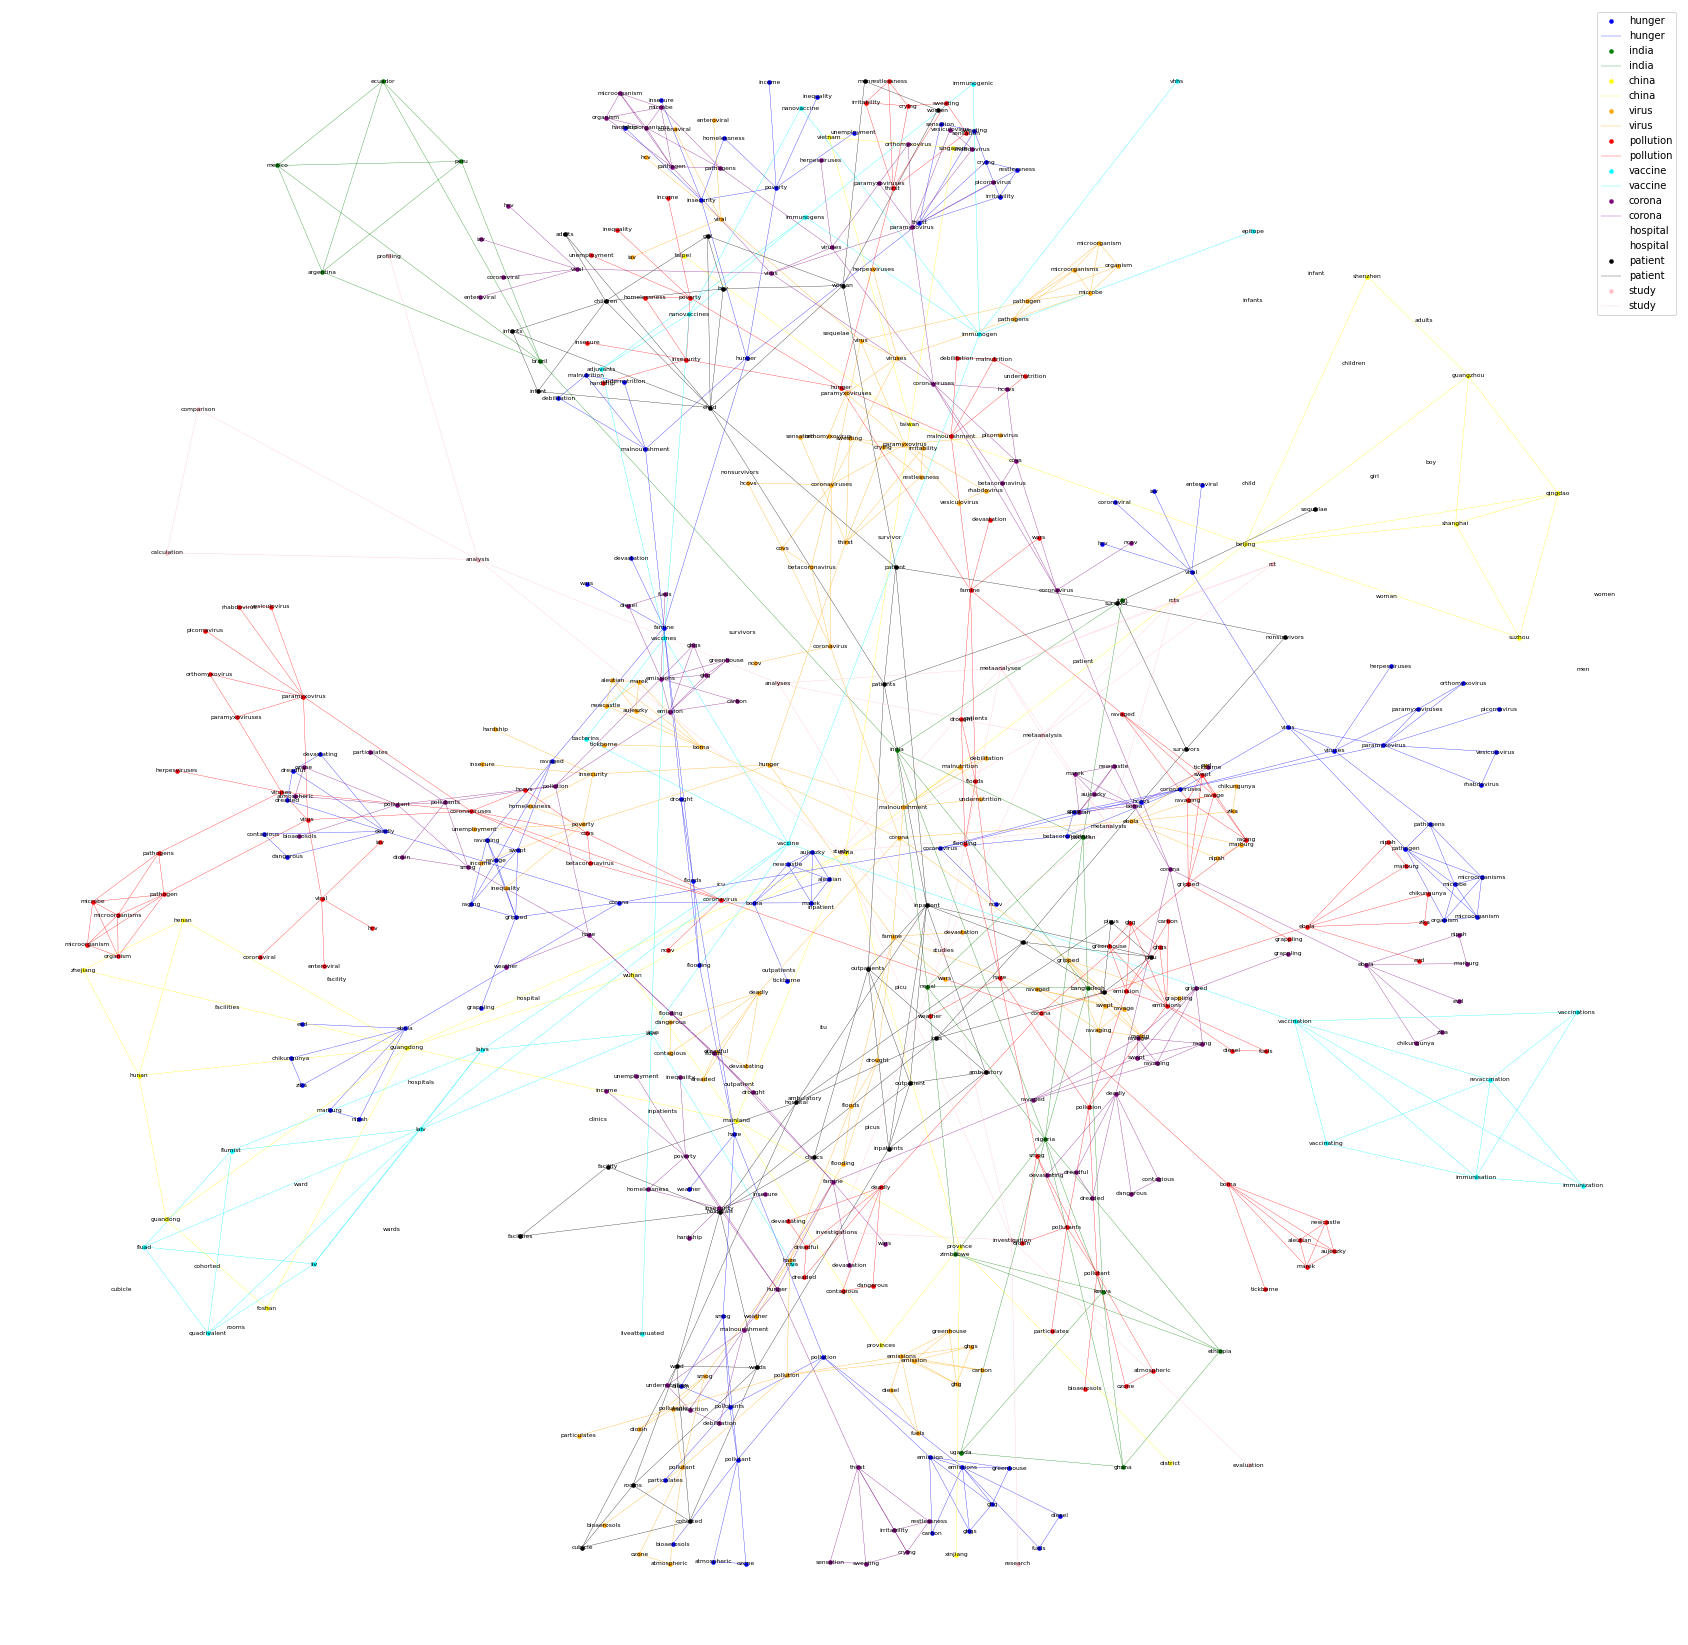

In [ ]:
words = pd.read_csv('drive/MyDrive/data/similar_words_assignment32.csv')
g = nx.cubical_graph()

#Construct the graph
#for every source word(node), add edges - connected through similarity
#As there two levels of similar words, we need to repeat the same to construct the graph
for i, row in words.iterrows():
    for j in range(1,len(row)):
        g.add_node(row[j])
    for j in range(1,len(row)):
        g.add_edge(row[1], row[j])    
      
G = nx.petersen_graph()
plt.subplot()
options1 = {
    'node_color': 'blue',
    'node_size': 20,
    'edge_color': 'blue',
    'linewidths': 0.1,
    'width': 0.3,
    'font_size':6,
}
options2 = {
    'node_color': 'green',
    'node_size': 20,
    'edge_color': 'green',
    'linewidths': 0.1,
    'width': 0.3,
    'font_size':6,
}
options3 = {
    'node_color': 'yellow',
    'node_size': 20,
    'edge_color': 'yellow',
    'linewidths': 0.1,
    'width': 0.3,
    'font_size':6,
}
options4 = {
    'node_color': 'orange',
    'node_size': 20,
    'edge_color': 'orange',
    'linewidths': 0.1,
    'width': 0.3,
    'font_size':6,
}
options5 = {
    'node_color': 'red',
    'node_size': 20,
    'edge_color': 'red',
    'linewidths': 0.1,
    'width': 0.3,
    'font_size':6,
}
options6 = {
    'node_color': 'cyan',
    'node_size': 20,
    'edge_color': 'cyan',
    'linewidths': 0.1,
    'width': 0.3,
    'font_size':6,
}
options7 = {
    'node_color': 'purple',
    'node_size': 20,
    'edge_color': 'purple',
    'linewidths': 0.1,
    'width': 0.3,
    'font_size':6,
}
options8 = {
    'node_color': 'white',
    'node_size': 20,
    'edge_color': 'white',
    'linewidths': 0.1,
    'width': 0.3,
    'font_size':6,
}
options9 = {
    'node_color': 'black',
    'node_size': 20,
    'edge_color': 'black',
    'linewidths': 0.1,
    'width': 0.3,
    'font_size':6,
}
options10 = {
    'node_color': 'pink',
    'node_size': 20,
    'edge_color': 'pink',
    'linewidths': 0.1,
    'width': 0.3,
    'font_size':6,
}

fedges = filter(lambda x: g.degree()[x[0]] > 5 and g.degree()[x[1]] > 5, g.edges())
f = nx.Graph()                                                                                                                                     
f.add_edges_from(fedges)

#This is to show how well the keyword is connected with the other words in the corpus  
#change the keyword to obtain a different graph
#you do not need this while running the entire no
plt.rcParams['figure.figsize'] = [30, 30]

subgraph1 = nx.node_connected_component(f,'hunger')
subgraph2 = nx.node_connected_component(f,'india')
subgraph3 = nx.node_connected_component(f,'china')
subgraph4 = nx.node_connected_component(f,'virus')
subgraph5 = nx.node_connected_component(f,'pollution')
subgraph6 = nx.node_connected_component(f,'vaccine')
subgraph7 = nx.node_connected_component(f,'corona')
subgraph8 = nx.node_connected_component(f,'hospital')
subgraph9 = nx.node_connected_component(f,'patient')
subgraph10 = nx.node_connected_component(f,'study')
print()
nx.draw(g.subgraph(subgraph1), with_labels=True, **options1,label = 'hunger')
nx.draw(g.subgraph(subgraph2), with_labels=True, **options2, label = 'india')
nx.draw(g.subgraph(subgraph3), with_labels=True, **options3, label = 'china')
nx.draw(g.subgraph(subgraph4), with_labels=True, **options4, label = 'virus')
nx.draw(g.subgraph(subgraph5), with_labels=True, **options5, label = 'pollution')
nx.draw(g.subgraph(subgraph6), with_labels=True, **options6, label = 'vaccine')
nx.draw(g.subgraph(subgraph7), with_labels=True, **options7, label = 'corona')
nx.draw(g.subgraph(subgraph8), with_labels=True, **options8, label = 'hospital')
nx.draw(g.subgraph(subgraph9), with_labels=True, **options9, label = 'patient')
nx.draw(g.subgraph(subgraph10), with_labels=True, **options10, label = 'study')
#nx.draw(g.subgraph(subgraph), with_labels=True, **options)
#nx.draw(g,with_labels = True,**options)
plt.savefig("drive/MyDrive/data/nodes.pdf")
plt.legend()
plt.show()